In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src.models.MultyModalGPT2 import MultyModalGPT2
from src.data.shemas import ConfigData, ConfigTraining
from src.data.datasets import AlfredDataset
from src.pipelines.train_pipeline import train_loop, eval_batch

from torch.optim import AdamW
import matplotlib.pyplot as plt

In [7]:
train_cfg = ConfigTraining(
    train_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/train/",
    test_data_path = "../data/raw/json_feat_2.1.0/json_feat_2.1.0/valid_seen/",
    epoch_num=10,
    data_samples_num=500
)

cfg = ConfigData(
    device="cuda",
    train_cfg=train_cfg
)

In [4]:
train_dataset = AlfredDataset(cfg, promt_type="task2low_actions")
test_dataset = AlfredDataset(cfg, dataset_type="test", promt_type="task2low_actions")

In [5]:
train_dataset[0]

{'promts': ['<|endoftext|>Task: pick up the alarm clock and turn on the lamp.. What is you action plan?<|endoftext|>',
  '<|endoftext|>Task: carry an alarm clock while turning on a lamp. What is you action plan?<|endoftext|>',
  '<|endoftext|>Task: examine an alarm clock by the light of the lamp on the dresser. What is you action plan?<|endoftext|>'],
 'images_features': None,
 'targets': ['lookdown moveahead moveahead rotateleft lookup pickupobject lookdown rotateleft moveahead rotateright lookup toggleobjecton',
  'lookdown moveahead moveahead rotateleft lookup pickupobject lookdown rotateleft moveahead rotateright lookup toggleobjecton',
  'lookdown moveahead moveahead rotateleft lookup pickupobject lookdown rotateleft moveahead rotateright lookup toggleobjecton']}

In [6]:
mmgpt = MultyModalGPT2(cfg)
mmgpt.train()
# mmgpt.set_bias_training()
opt = AdamW(mmgpt.get_trainable_params())

In [8]:
history = train_loop(mmgpt, train_dataset, test_dataset, opt, cfg)

Epoch 1/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 2/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 3/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 4/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 5/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 6/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 7/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 8/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 9/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

Epoch 10/10


TRAIN:   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/500 [00:00<?, ?it/s]

EVAL :   0%|          | 0/251 [00:00<?, ?it/s]

In [13]:
history

{'train_loss': [0.6128590775728225,
  0.4847128105163574,
  0.4624335659146309,
  0.4595510123372078,
  0.43710257160663607,
  0.42838408797979355,
  0.43020274469256403,
  0.41976478746533397,
  0.4182068029940128,
  0.4121716415286064],
 'train_acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'train_cer': [0.12153021,
  0.13414031,
  0.25661975,
  0.121670395,
  0.12482889,
  0.12134569,
  0.12134602,
  0.12192223,
  0.12146985,
  0.12076956],
 'test_loss': [1.5447983409304067,
  1.5020027998909058,
  1.6705627960275369,
  1.7850559965310344,
  1.814831929140357,
  2.27521980153137,
  2.038299703621769,
  2.3105617146567994,
  1.7181391020220114,
  2.0117029459827926],
 'test_acc': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'test_cer': [0.20692533,
  0.18515003,
  0.3341932,
  0.17795584,
  0.17353065,
  0.17083468,
  0.18934537,
  0.17142259,
  0.17218123,
  0.17484654]}

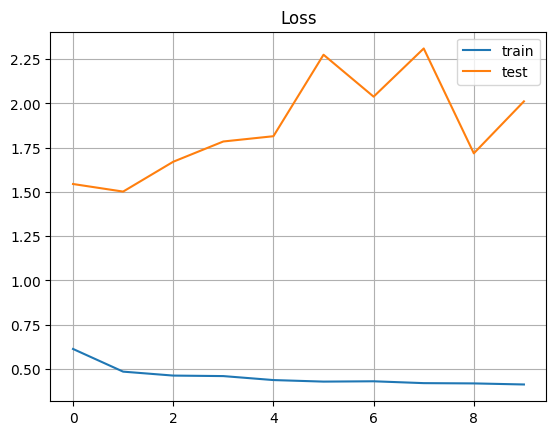

In [14]:
plt.title("Loss")
plt.plot(history["train_loss"], label="train")
plt.plot(history["test_loss"], label="test")
plt.grid()
plt.legend()

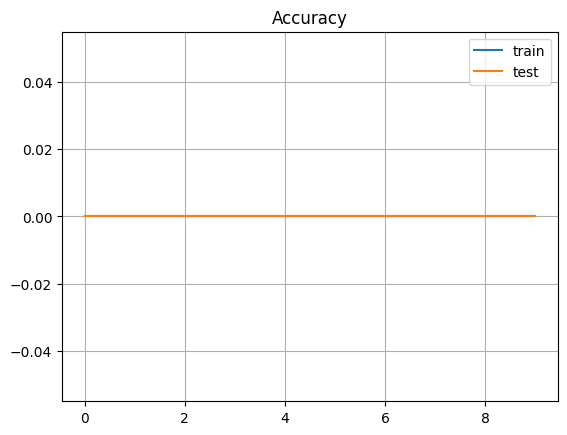

In [11]:
plt.title("Accuracy")
plt.plot(history["train_acc"], label="train")
plt.plot(history["test_acc"], label="test")
plt.grid()
plt.legend()

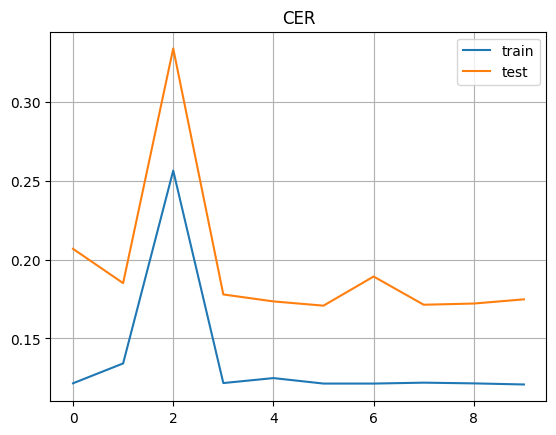

In [15]:
plt.title("CER")
plt.plot(history["train_cer"], label="train")
plt.plot(history["test_cer"], label="test")
plt.grid()
plt.legend()